In [8]:
using Plots
using LaTeXStrings
using LinearAlgebra
empty!(ARGS)
push!(ARGS, "/home/julisn/Codes/lDGA_pp_test/test_2")
push!(ARGS, "/home/julisn/Codes/lDGA_pp_test/test_2")

#scalefontsizes(1.8)
include("../expand_vertex_pp.jl");

ωi0 = nBose+1;

opening: /home/julisn/Codes/lDGA_pp_test/test_2/freqList.jld2
Generating Eigenspace:   0.0% done.

  Activating project at `~/Codes/lDGAPostprocessing`


Eigenspace generated!                  
Expanding Vertex for nFermi=50, nBose=50, shift=1
Done expanding!
Done with pp channel!
Done with ph channel!


### Asymptotic Behavior

## $\Gamma$ 

$\Gamma^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} $

## $F$

$F^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp} + U \lambda^{\nu\omega}_d + U \lambda^{\nu'\omega}_d + U^2 \chi^{\omega}_d$

$F^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp}  + U \lambda^{\nu\omega}_m + U \lambda^{\nu'\omega}_m + U^2 \chi^{\omega}_m$

$F^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} + 2U \lambda^{\nu\omega}_{pp,\uparrow\downarrow} + 2U \lambda^{\nu'\omega}_{pp,\uparrow\downarrow} + 2 U^2 \chi^{\omega}_{pp,\uparrow\downarrow}$


In [9]:
Γd_lim_diag =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 
Γm_lim_diag = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 
Γs_lim_diag = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2;

Γd_lim_bg =  U
Γm_lim_bg = -U
Γs_lim_bg = 2U;

Fd_lim_diag =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 - 1 * U^2 * χ_d_asympt[1]/β^2
Fm_lim_diag = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 - 1 * U^2 * χ_m_asympt[1]/β^2
Fs_lim_diag = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 - 2 * U^2 * χ_pp_asympt[1]/β^2;

Fd_lim_bg =  U^2 * χ_d_asympt[1]/β^2 
Fm_lim_bg = -U - 1 * U^2 * χ_m_asympt[1]/β^2 
Fs_lim_bg = 2U - 2 * U^2 * χ_pp_asympt[1]/β^2;

#Γm_diags = dropdims(mapslices(x->diag(x), Γm, dims=(1,2)),dims=2);
#Γd_diags = dropdims(mapslices(x->diag(x), Γd, dims=(1,2)),dims=2);
#Γs_diags = dropdims(mapslices(x->diag(x), Γs, dims=(1,2)),dims=2);

In [18]:
# - compensates global -1 factor in script

function format_out(val, lim; digits=5)
    lim_s = lpad(rpad(round(real(lim),digits=digits), 10),10)
    val_s = lpad(rpad(round(real(val),digits=digits), 10),10)
    return "$val_s ?=? $lim_s"
end
nan_ind = trunc(Int,nBose/2+10)
println("                      border ?=? exact")
println("Diagonal Γd  :   $(format_out(-Γch[1,1,1] .* β^2 , Γd_lim_diag))")
println("Diagonal Γm  :   $(format_out(-Γsp[1,1,1] .* β^2 , Γm_lim_diag))")
println("Diagonal Γs  :   $(format_out(Γs[1+nan_ind,1+nan_ind,nBose+1]  .* β^2 , Γs_lim_diag))")
println("Background Γd:   $(format_out(-Γch[30,1,1] .* β^2, Γd_lim_bg))")
println("Background Γm:   $(format_out(-Γsp[30,1,1] .* β^2, Γm_lim_bg))")
println("Background Γs:   $(format_out(Γs[nan_ind,1+nan_ind+10,nBose+1]  .* β^2, Γs_lim_bg))")
println("   ========================================   ")
println("                      border ?=? exact")
println("Diagonal Fd  :   $(format_out(Fd[1,1,nBose+1] .* β^2, Fd_lim_diag))")
println("Diagonal Fm  :   $(format_out(Fm[1,1,nBose+1] .* β^2, Fm_lim_diag))")
println("Diagonal Fs  :   $(format_out(Fs[1+nan_ind,1+nan_ind,nBose+1] .* β^2, Fs_lim_diag))")
println("Background Fd:   $(format_out(Fd[30,1,nBose+1].* β^2, Fd_lim_bg))")
println("Background Fm:   $(format_out(Fm[30,1,nBose+1].* β^2, Fm_lim_bg))")
println("Background Fs:   $(format_out(Fs[nan_ind,1+nan_ind+2,nBose+1].* β^2, Fs_lim_bg))")

                      border ?=? exact
Diagonal Γd  :   13.92053   ?=? 13.92056  
Diagonal Γm  :   -5.71003   ?=? -5.68819  
Diagonal Γs  :   15.53902   ?=? 15.49256  
Background Γd:   1.98713    ?=? 2.0       
Background Γm:   -2.03064   ?=? -2.0      
Background Γs:   3.92146    ?=? 4.0       
                      border ?=? exact
Diagonal Fd  :   13.49431   ?=? 13.49256  
Diagonal Fm  :   -13.49294  ?=? -13.49256 
Diagonal Fs  :   58.95137   ?=? 14.72503  
Background Fd:   1.56545    ?=? 0.428     
Background Fm:   -9.81085   ?=? -9.80437  
Background Fs:   12.95673   ?=? 3.23247   


In [3]:
# Checking sign of χ^νν'ω_DMFT

χm_gen_rs = reshape(χph_upup .- χph_updo, 2*nFermi, 2*nFermi, 2*nBose+1);
χd_gen_rs = reshape(χph_upup .+ χph_updo, 2*nFermi, 2*nFermi, 2*nBose+1);

χm = dropdims(sum(χm_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
χd = dropdims(sum(χd_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
p1 = plot(-nBose:nBose, real(χm), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_m ")
plot!(0:nBose, real(χ_m_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_m")
p2 = plot(-nBose:nBose, real(χd), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_d ")
plot!(0:nBose, real(χ_d_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_d")
plot(p1,p2, size=(800,300))

LoadError: UndefVarError: `χph_upup` not defined

In [4]:
χpp_updo = (0.5 .* (χpp_s + χpp_t))
nan_ind = isnan.(χpp_updo)
χpp_updo[nan_ind] .= 0.0;
for (ωi,ωn) in enumerate(-nBose:nBose)
    for (νi,νn) in  enumerate((-nFermi:nFermi-1) .- shift*trunc(Int, ωn/2)) 
        χpp_updo[νi,νi,ωi] -= χ0_pp_full[(ωn,νn)]
    end
end

χpp_updo_ω = sum(χpp_updo, dims=(1,2))[1,1,:]/β^2;
plot(-nBose:nBose, real(χpp_updo_ω), markershape=:auto)
plot!(0:9, real(χ_pp_asympt)[1:10] ./ β^2, markershape=:auto)

LoadError: UndefVarError: `χpp_s` not defined

In [6]:
lim_b = U/β^2

plot(real(-Γm[:,end,end]),  label=L"\Gamma_\mathrm{m}^{\nu\nu'_{49}\omega_{100}}")
plot!(real(-Γd[:,end,end]), label=L"\Gamma_\mathrm{d}^{\nu\nu'_{49}\omega_{100}}")
hline!([ lim_b], label=L"+\frac{U}{\beta^2}")
hline!([-lim_b], label=L"-\frac{U}{\beta^2}")

LoadError: UndefVarError: `Γm` not defined

# PP channel
## chi

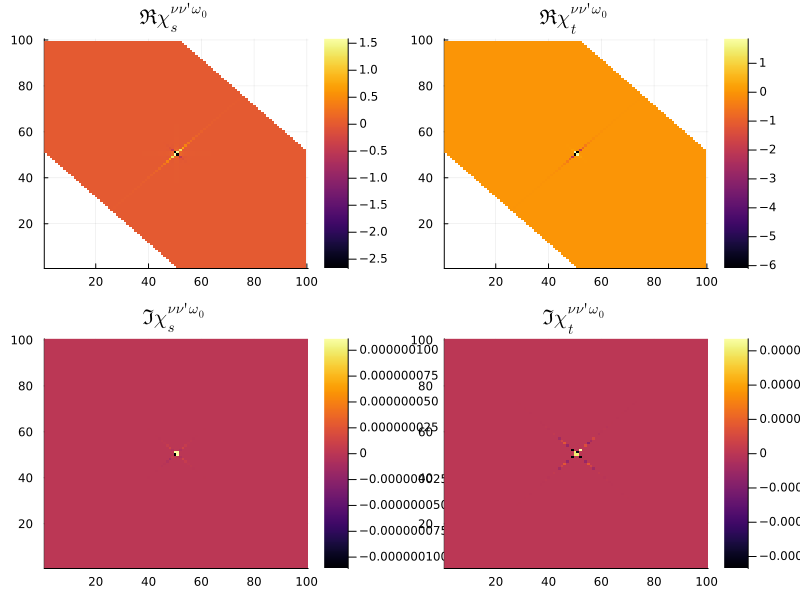

In [7]:
p1 = heatmap(real(χpp_s[:,:,ωi0]), title=L"\Re \chi^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(χpp_t[:,:,ωi0]), title=L"\Re \chi^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(χpp_s[:,:,ωi0]), title=L"\Im \chi^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(χpp_t[:,:,ωi0]), title=L"\Im \chi^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(800,600))

## Gamma

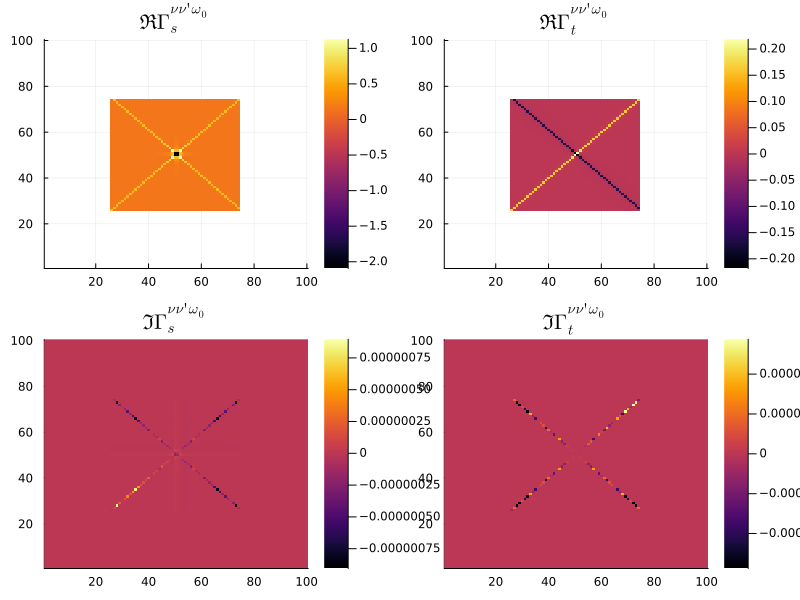

In [8]:
p1 = heatmap(real(Γs[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Γt[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Γs[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Γt[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(800,600))

In [9]:
p1 = heatmap(real(Γm[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_m")
p2 = heatmap(real(Γd[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_d")
p3 = heatmap(imag(Γm[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_m")
p4 = heatmap(imag(Γd[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_d")
plot(p1, p2, p3, p4, size=(800,600))

LoadError: UndefVarError: `Γm` not defined

In [10]:
p1 = heatmap(real(Γm[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_m")
p2 = heatmap(real(Γd[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_d")
p3 = heatmap(imag(Γm[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_m")
p4 = heatmap(imag(Γd[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_d")
plot(p1, p2, p3, p4, size=(800,600))

LoadError: UndefVarError: `Γm` not defined

## Full Vertex

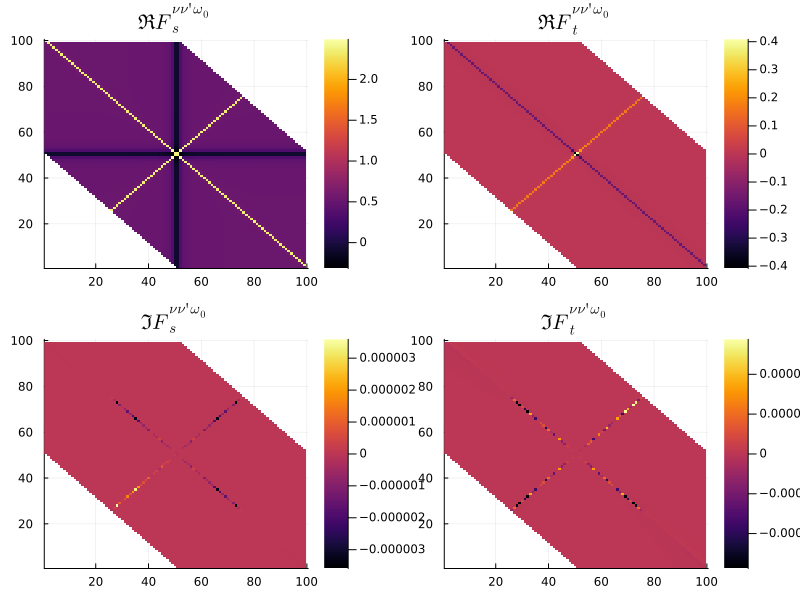

In [11]:
Fs_r = reshape(Fs, 2*nFermi, 2*nFermi, 2*nBose+1)
Ft_r = reshape(Ft, 2*nFermi, 2*nFermi, 2*nBose+1)

p1 = heatmap(real(Fs_r[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Ft_r[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Fs_r[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Ft_r[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(800,600))

In [21]:
 Fs_r[35,45,ωi0]

0.49708246724239097 + 7.744405311519424e-11im

In [20]:
2U - 2*U^2 * χ_pp_asympt[1] / β^2

0.7692988371520001 + 0.0im

In [14]:
Ft_r[35,45,51]

0.00014445245753396999 - 8.912212461669178e-12im

## Phi

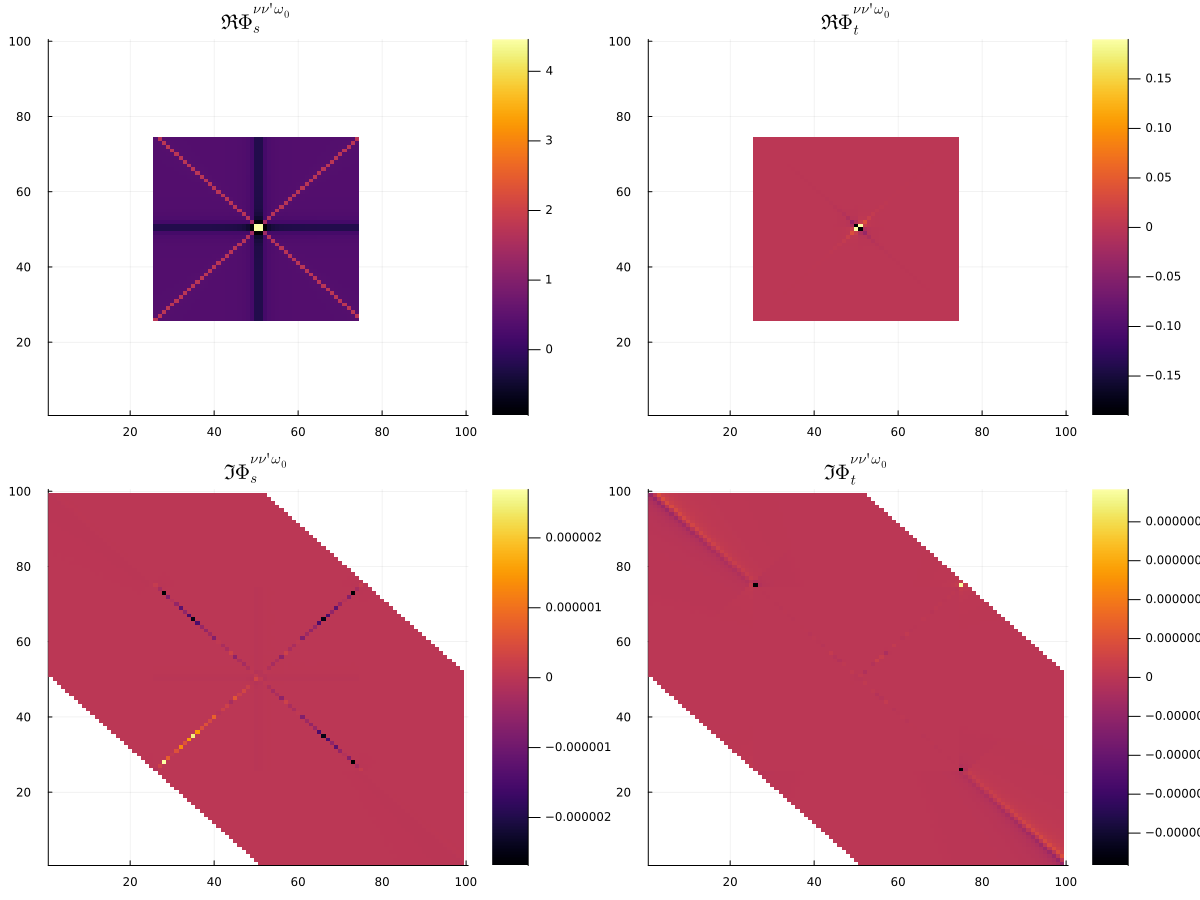

In [15]:
p1 = heatmap(real(Φs[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Φt[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Φs[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Φt[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(1200,900))

In [16]:
Φs[26,43,ωi0]

0.34973591697921047 + 1.8038363776138685e-9im

In [17]:
U^2 * χ_pp_asympt[1] / β^2

0.3837645356 - 0.0im

In [18]:
Φt[35,45,ωi0]

3.257339052942514e-6 - 3.723143515083842e-15im